In [1]:
# === Tornar 'src' importável no notebook ===
import sys
from pathlib import Path

def find_project_root(marker='src'):
    p = Path.cwd()
    # Sobe até 5 níveis procurando a pasta 'src'
    for _ in range(5):
        if (p / marker).exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    raise RuntimeError("Não achei a pasta 'src'. Abra o notebook a partir da raiz do projeto.")

ROOT = find_project_root()           # deve dar algo como C:\Projeto\starter
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

# garante que 'src' é pacote
(Path(ROOT) / 'src' / '__init__.py').touch()

print("ROOT =", ROOT)

# Imports do projeto (via pacote)
import cv2, numpy as np
import matplotlib.pyplot as plt
from src.pipeline import process_image, inner_crop
from src.detect import find_plate_bbox, crop_bbox
from src.ocr import best_plate

def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def show(title, img, cmap=None):
    plt.figure(figsize=(6,4))
    if cmap: plt.imshow(img, cmap=cmap)
    else:    plt.imshow(bgr2rgb(img))
    plt.title(title); plt.axis('off'); plt.show()

def hist_gray(gray, title="Histograma (tons de cinza)"):
    plt.figure(figsize=(6,4))
    plt.hist(gray.ravel(), bins=256, range=(0,255))
    plt.title(title); plt.xlabel("Intensidade"); plt.ylabel("Contagem"); plt.show()


ROOT = c:\Projeto\starter


Using CPU. Note: This module is much faster with a GPU.


CWD = c:\Projeto\starter\src
IMG = c:\Projeto\starter\data\images\car1.jpg | exists: True
Dimensões (linhas x colunas): 419 x 730


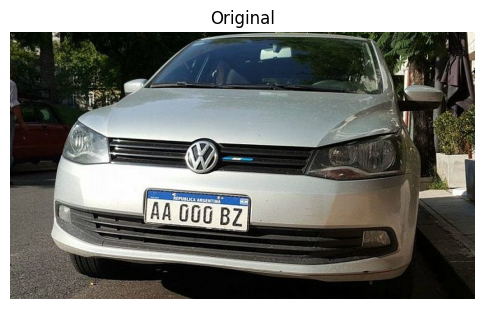

In [2]:
from pathlib import Path

# use sempre ROOT para montar caminhos a partir da raiz do projeto
IMG = (ROOT / "data" / "images" / "car1.jpg")   # troque para car1.jpg / car2.jpg se quiser
print("CWD =", Path.cwd())                      # onde o notebook está
print("IMG =", IMG, "| exists:", IMG.exists())

img = cv2.imread(str(IMG))
assert img is not None, f"Não achei: {IMG}"

h, w = img.shape[:2]
print("Dimensões (linhas x colunas):", h, "x", w)
show("Original", img)


Min/Max (grayscale): 0 255


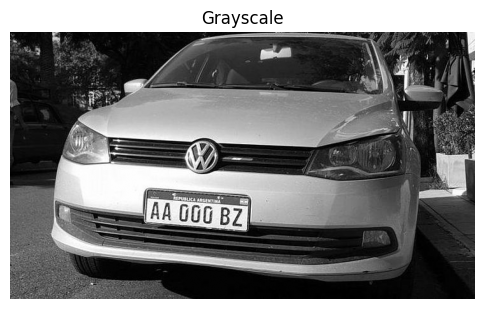

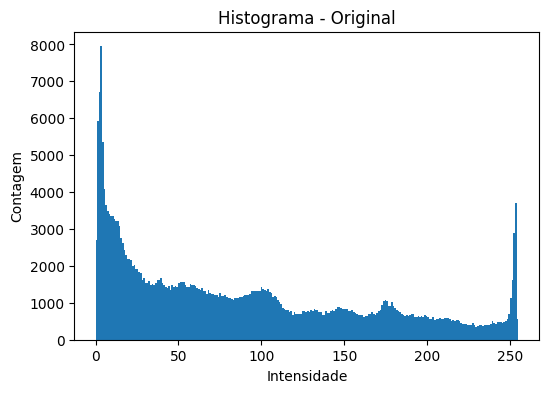

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Min/Max (grayscale):", int(gray.min()), int(gray.max()))
show("Grayscale", gray, cmap="gray")
hist_gray(gray, "Histograma - Original")


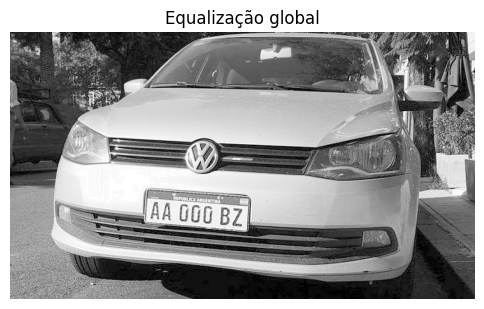

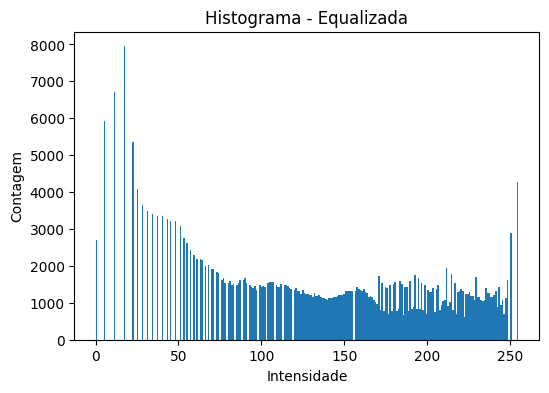

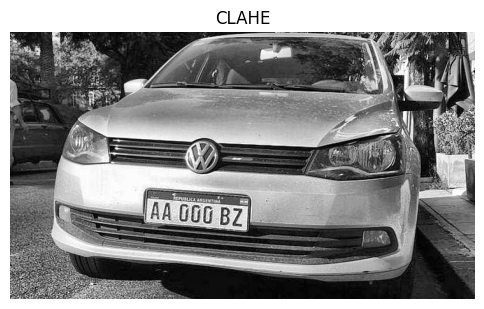

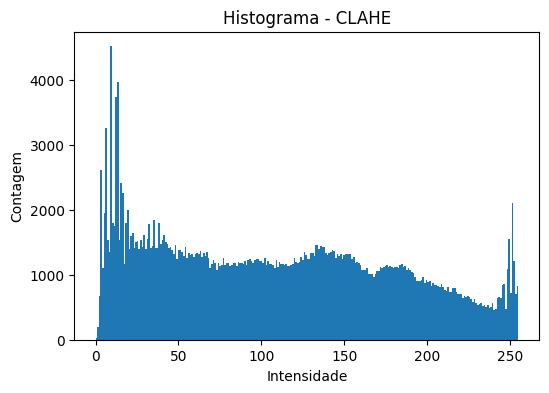

In [4]:
eq = cv2.equalizeHist(gray)  # equalização global
clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8)).apply(gray)

show("Equalização global", eq, cmap="gray")
hist_gray(eq, "Histograma - Equalizada")
show("CLAHE", clahe, cmap="gray")
hist_gray(clahe, "Histograma - CLAHE")


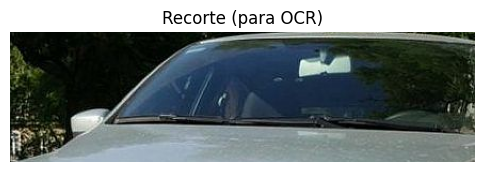

Candidatos: []
Melhor leitura: None conf= 0.0


In [5]:
bbox = find_plate_bbox(img)
crop = crop_bbox(img, bbox) if bbox is not None else img.copy()
show("Recorte (para OCR)", crop)
plate, conf, cands = best_plate(crop)  # usa pipeline de OCR com correções e fallback
print("Candidatos:", cands[:5])
print("Melhor leitura:", plate, "conf=", round(conf,3))


In [6]:
res = process_image(str(IMG))
res


c:\Projeto\starter\.venv\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'id': 1,
 'plate_text': 'AA000BZ',
 'confidence': 0.18633803791928763,
 'source_path': 'c:\\Projeto\\starter\\data\\images\\car1.jpg',
 'crop_path': 'data/output\\car1_crop_20250906_203851.jpg',
 'annotated_path': 'data/output\\car1_annot_20250906_203851.jpg',
 'candidates': [('AA000BZ', 0.18633803791928763)]}